# PRV Assignment 2

- Pablo Garcia Fernández

Initial configuration

In [10]:
# Initial configuration
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### 1- Obtain correspondence points from undistorted images 

In [39]:
def obtain_points(img1_n, img2_n, k=20000, pintar=False):
    img1 = cv.imread(img1_n, cv.IMREAD_GRAYSCALE) 
    img2 = cv.imread(img2_n, cv.IMREAD_GRAYSCALE)

    sift = cv.SIFT_create(k)
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x:x.distance)
    print(f"Total no. matches: {len(matches)}")
    
    if pintar:
        img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:8], img2, flags=2)
        plt.imshow(img3)
        plt.savefig(img1_n + img2_n + ".png", dpi=400)
        plt.show()

    return matches

Total no. matches: 12354


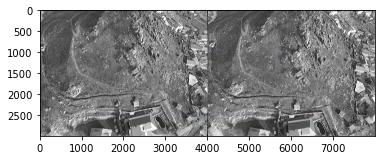

In [40]:
matches = obtain_points('DJI_0186.jpg', 'DJI_0187.jpg', pintar=True)